In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf
import pandas as pd

# List of 20 stock tickers
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "BRK-B", "JPM", "V",
    "PG", "JNJ", "UNH", "HD", "MA", "DIS", "PYPL", "NFLX", "INTC", "PEP"
]

# Create an empty DataFrame to store merged data
merged_data = pd.DataFrame()

for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    # Fetch historical data for 10 years with all parameters
    data = stock.history(period="10y")[["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]]
    
    # Remove timezone from datetime index
    data.index = data.index.tz_localize(None)

    # Rename columns to include stock ticker
    data = data.add_prefix(f"{ticker}_")

    if merged_data.empty:
        merged_data = data  # Initialize with first stock
    else:
        merged_data = merged_data.join(data, how="outer")  # Merge on date




In [3]:
df=pd.read_excel("data.xlsx")


In [4]:
df.head(5)

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AAPL_Dividends,AAPL_Stock Splits,MSFT_Open,MSFT_High,...,INTC_Volume,INTC_Dividends,INTC_Stock Splits,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,PEP_Dividends,PEP_Stock Splits
0,2015-03-04,28.831607,28.934336,28.657412,28.706541,126665200,0.0,0,37.120788,37.293403,...,23005800,0.0,0,73.538770,73.636599,73.087243,73.267853,3884200,0.655,0
1,2015-03-05,28.715473,28.753438,28.085689,28.230852,226068400,0.0,0,37.172565,37.319289,...,21225800,0.0,0,73.523690,73.621524,73.154944,73.169998,3537200,0.000,0
2,2015-03-06,28.675274,28.891902,28.197354,28.273285,291368400,0.0,0,37.112146,37.207085,...,32373100,0.0,0,72.996921,73.109804,72.199225,72.372307,6466100,0.000,0
3,2015-03-09,28.577008,28.936567,27.929357,28.393879,354114000,0.0,0,36.413068,37.224359,...,33058800,0.0,0,72.244373,72.620645,72.221797,72.274475,4810500,0.000,0
4,2015-03-10,28.230853,28.411748,27.647968,27.806530,275426400,0.0,0,36.551150,36.861857,...,50278900,0.0,0,71.777805,71.943366,71.062889,71.062889,5390300,0.000,0


In [5]:
df.shape

(2515, 141)

In [6]:
df['Date'].head()

0   2015-03-04
1   2015-03-05
2   2015-03-06
3   2015-03-09
4   2015-03-10
Name: Date, dtype: datetime64[ns]

In [7]:
df.isnull().sum()

Date                0
AAPL_Open           0
AAPL_High           0
AAPL_Low            0
AAPL_Close          0
                   ..
PEP_Low             0
PEP_Close           0
PEP_Volume          0
PEP_Dividends       0
PEP_Stock Splits    0
Length: 141, dtype: int64

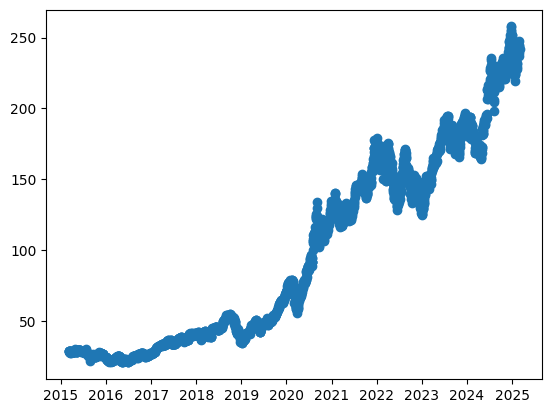

In [8]:
plt.scatter(df['Date'],df['AAPL_Open'])

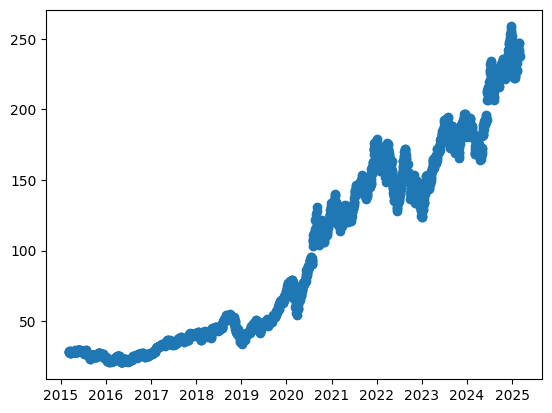

In [9]:
plt.scatter(df['Date'],df['AAPL_Close'])

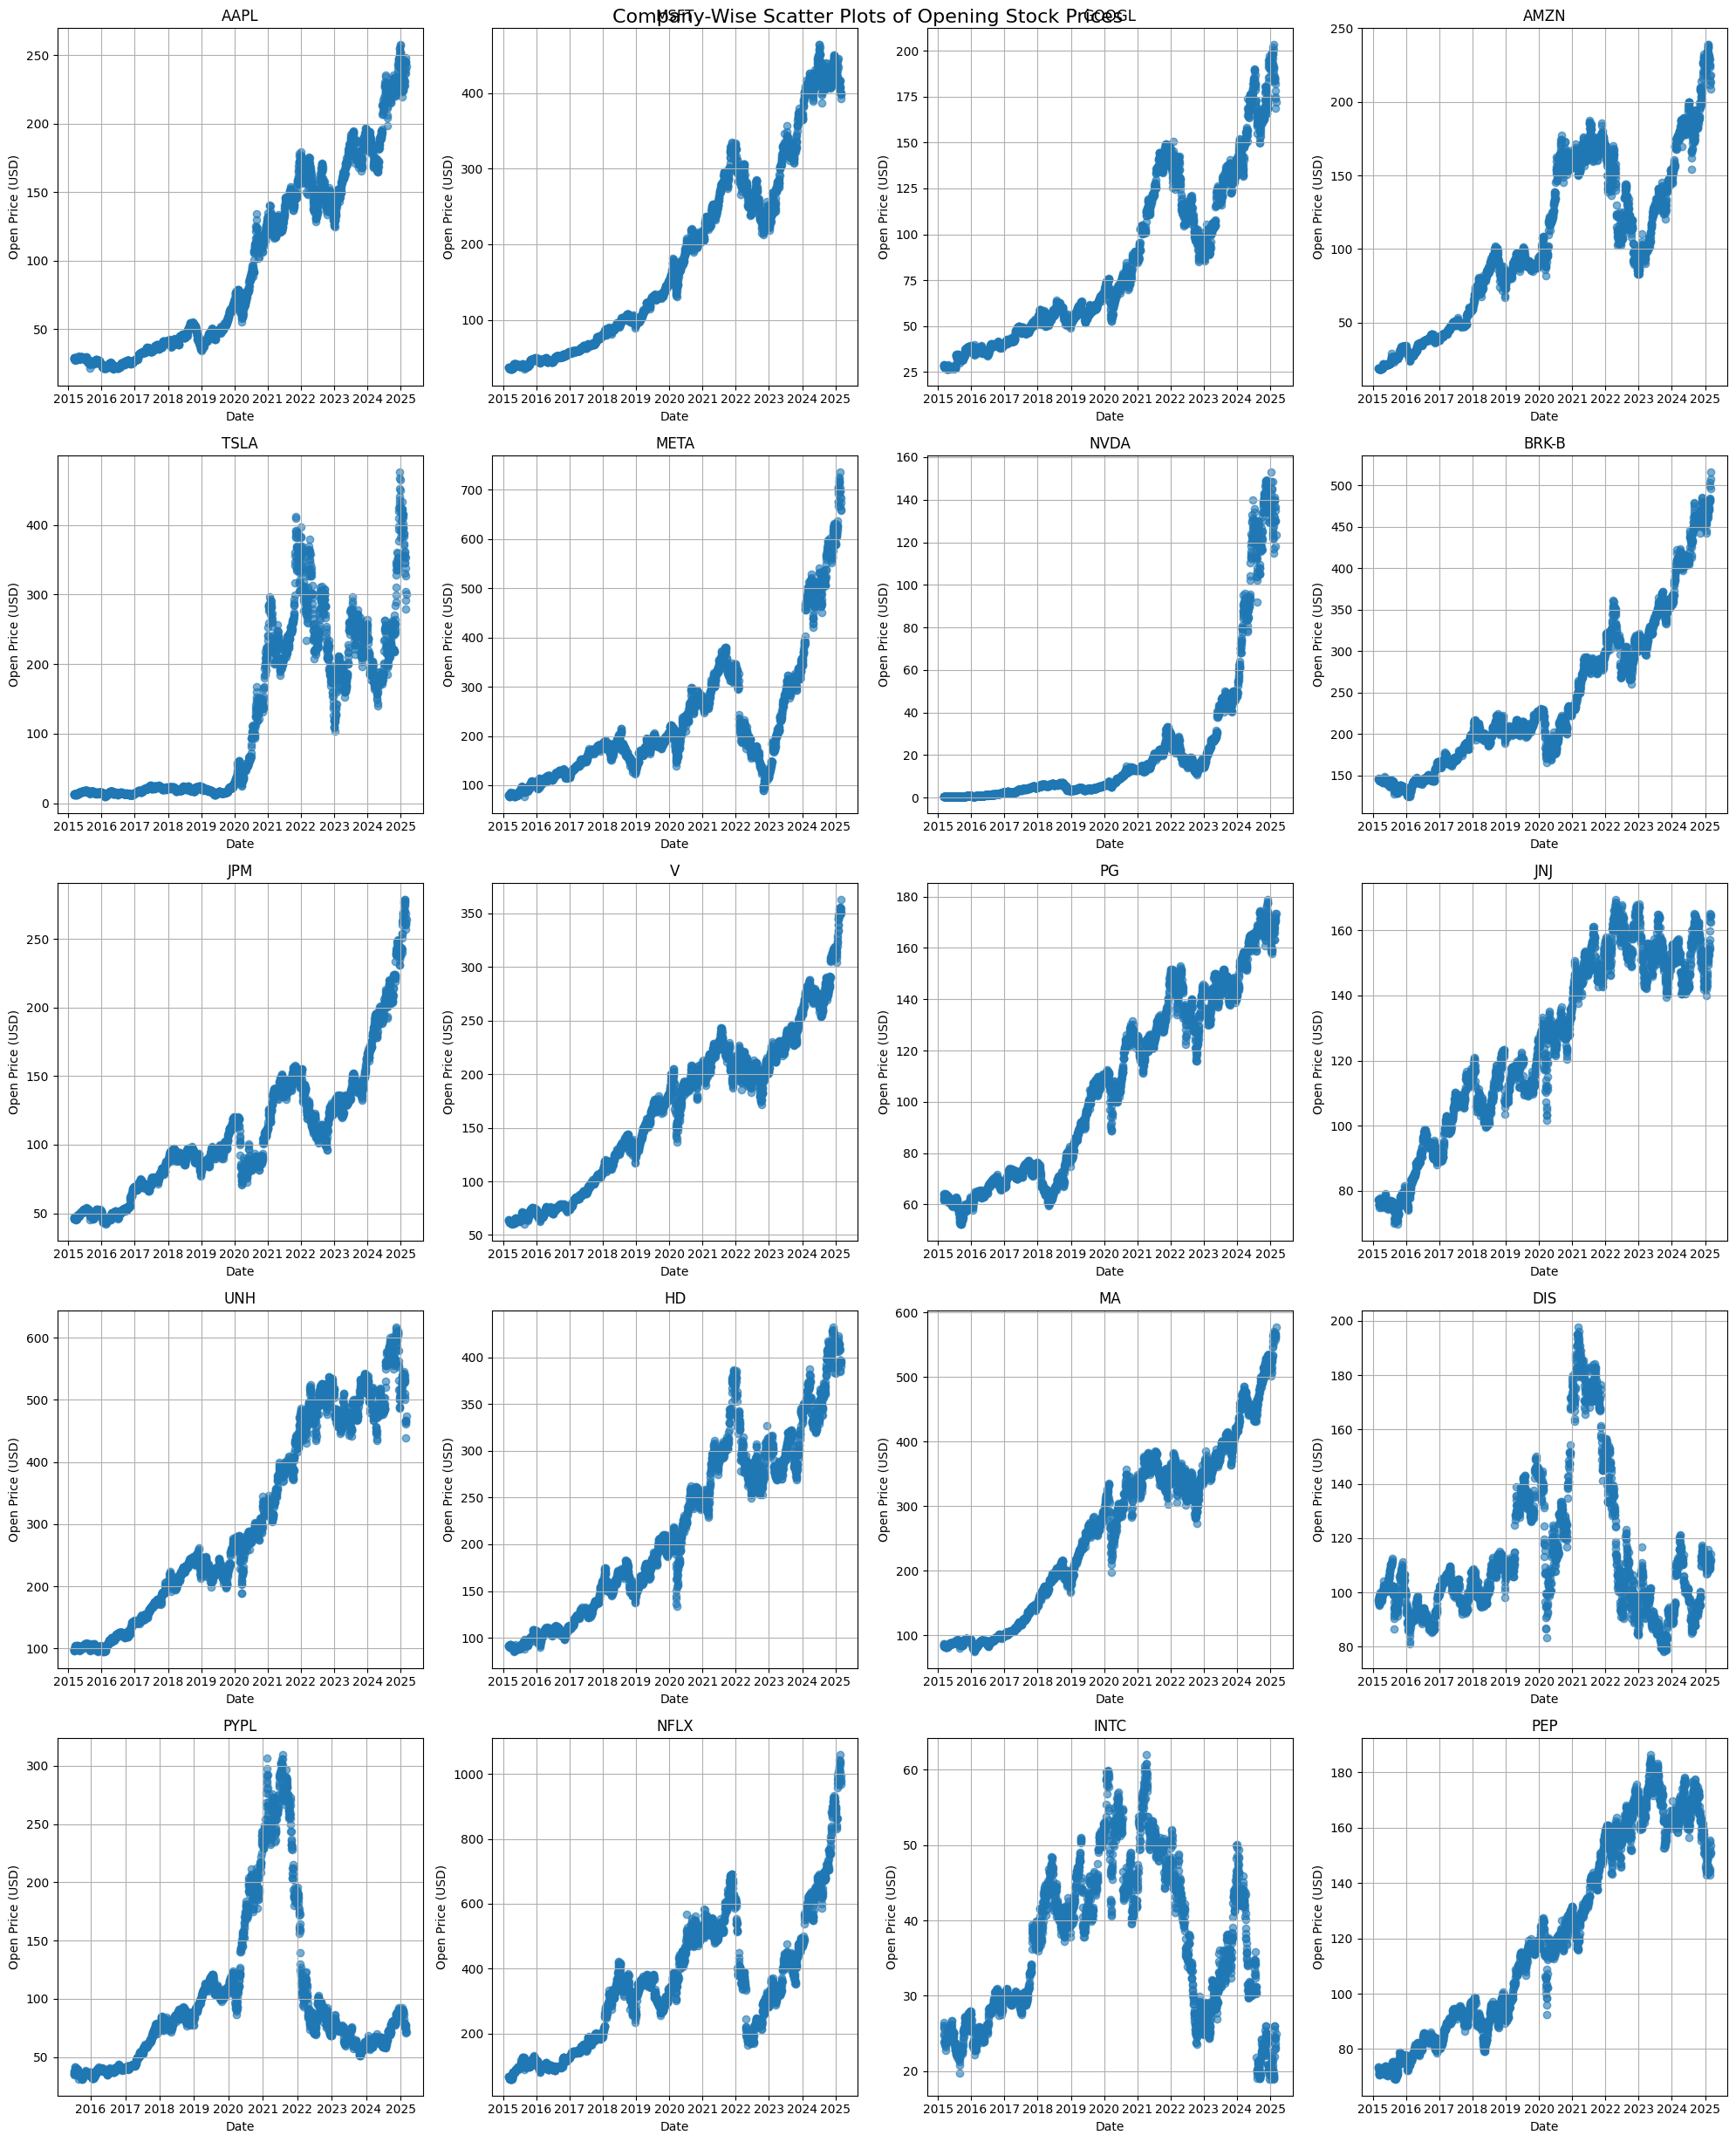

In [38]:
# Set up the subplot grid
num_companies = len(tickers)
num_rows = (num_companies + 3) // 4  # Adjust the number of rows and columns as needed
num_cols = 4

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
fig.suptitle('Company-Wise Scatter Plots of Opening Stock Prices', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each company's data in a separate subplot
for i, ticker in enumerate(tickers):
    ax = axes[i]
    ax.scatter(df['Date'], df[f'{ticker}_Open'], alpha=0.6)
    ax.set_title(ticker)
    ax.set_xlabel('Date')
    ax.set_ylabel('Open Price (USD)')
    ax.grid()

# Hide unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [10]:
df['AAPL_Close'].describe()

count    2515.000000
mean       97.546648
std        67.452390
min        20.674536
25%        36.376526
50%        70.211906
75%       154.678238
max       258.735504
Name: AAPL_Close, dtype: float64

In [11]:
df['AAPL_Open'].describe()

count    2515.000000
mean       97.456237
std        67.373260
min        20.596728
25%        36.379161
50%        70.079551
75%       154.533727
max       257.906429
Name: AAPL_Open, dtype: float64

In [12]:
df=df.dropna()
df.shape

(2430, 141)

In [13]:
df.columns

Index(['Date', 'AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close',
       'AAPL_Volume', 'AAPL_Dividends', 'AAPL_Stock Splits', 'MSFT_Open',
       'MSFT_High',
       ...
       'INTC_Volume', 'INTC_Dividends', 'INTC_Stock Splits', 'PEP_Open',
       'PEP_High', 'PEP_Low', 'PEP_Close', 'PEP_Volume', 'PEP_Dividends',
       'PEP_Stock Splits'],
      dtype='object', length=141)

In [14]:
df['AAPL_Dividends'].describe()

count    2430.000000
mean        0.003156
std         0.025197
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.250000
Name: AAPL_Dividends, dtype: float64

In [15]:
for i in range(len(tickers)):
    # Construct the column name for dividends
    dividend_column = f'{tickers[i]}_Dividends'
    
    # Calculate the mean of non-zero dividends
    temp = df.loc[df[dividend_column] != 0, dividend_column].mean()
    
    # Replace nan with 0 (or another value)
    if pd.isna(temp):
        temp = 0
    
    # Print the ticker and the mean of non-zero dividends
    print(tickers[i], temp)

AAPL 0.19666666666666666
MSFT 0.5376923076923076
GOOGL 0.20000000000000004
AMZN 0
TSLA 0
META 0.5
NVDA 0.004235526315789474
BRK-B 0
JPM 0.8236842105263158
V 0.3129487179487179
PG 0.8043333333333335
JNJ 0.9930769230769232
UNH 1.2142105263157899
HD 1.4373684210526316
MA 0.3917948717948718
DIS 0.7124999999999999
PYPL 0
NFLX 0
INTC 0.27962162162162163
PEP 0.9997368421052628


Creating a daily returns column in the dataset

In [16]:
df['daily_returns']= (df[f'{ticker}_Close']-df[f'{ticker}_Open']) /df[f'{ticker}_Open']


In [17]:
volatility = df['daily_returns'].std()
volatility

np.float64(0.010152491594437853)

Text(0.5, 1.0, 'Boxplot of Numerical Features')

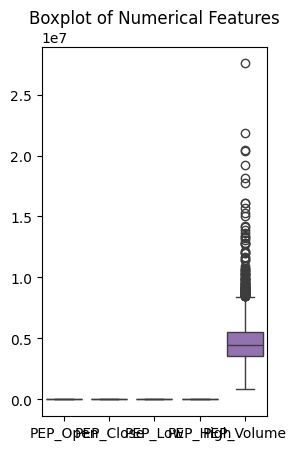

In [18]:
plt.subplot(1, 2, 1)
sns.boxplot(data=df[[f"{ticker}_Open", f"{ticker}_Close", f"{ticker}_Low",f"{ticker}_High",f"{ticker}_Volume"]])
plt.title('Boxplot of Numerical Features')


Inter Quantile Range

In [19]:
# Calculate IQR for each column and identify outliers
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the outlier mask
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)

# Filter out outliers
df_cleaned = df[~outlier_mask]

print(df_cleaned.shape)

(2323, 142)


Text(0.5, 1.0, 'Correlation of stock return')

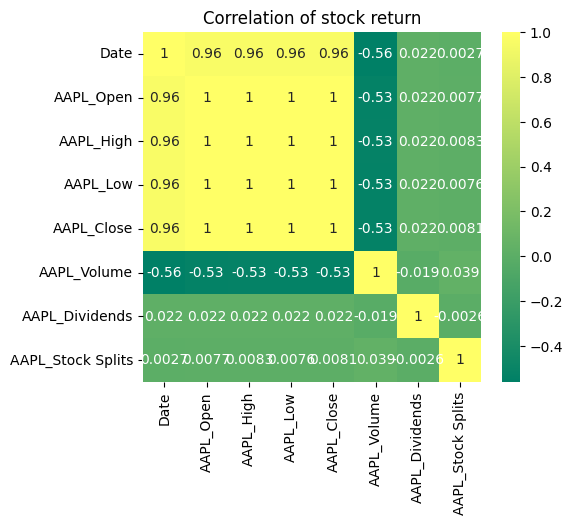

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(df_cleaned[['Date', 'AAPL_Open', 'AAPL_High', 'AAPL_Low', 'AAPL_Close',
       'AAPL_Volume', 'AAPL_Dividends', 'AAPL_Stock Splits']].corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

In [33]:
def compute_RSI(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

# Assuming your closing price column is named 'PEP_Close' based on the 'ticker' value:
df_cleaned['RSI'] = compute_RSI(df_cleaned[f'{ticker}_Close'])

C:\Users\anrut\AppData\Local\Temp\ipykernel_10120\2237369705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['RSI'] = compute_RSI(df_cleaned[f'{ticker}_Close'])


In [34]:
def compute_MACD(series, short_period=12, long_period=26, signal_period=9):
    short_ema = series.ewm(span=short_period, adjust=False).mean()
    long_ema = series.ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

df_cleaned['MCAD'] = compute_RSI(df_cleaned[f'{ticker}_Close'])

C:\Users\anrut\AppData\Local\Temp\ipykernel_10120\2283842283.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['MCAD'] = compute_RSI(df_cleaned[f'{ticker}_Close'])


In [35]:
df_cleaned['Volatility'] = df_cleaned[f'{ticker}_Close'].pct_change().rolling(10).std()
df_cleaned['SMA_50'] = df_cleaned[f'{ticker}_Close'].rolling(window=50).mean()
df_cleaned['SMA_200'] = df_cleaned[f'{ticker}_Close'].rolling(window=200).mean()
df_cleaned['Volume_Change'] = df_cleaned[f'{ticker}_Volume'].pct_change()

C:\Users\anrut\AppData\Local\Temp\ipykernel_10120\341049524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Volatility'] = df_cleaned[f'{ticker}_Close'].pct_change().rolling(10).std()
C:\Users\anrut\AppData\Local\Temp\ipykernel_10120\341049524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SMA_50'] = df_cleaned[f'{ticker}_Close'].rolling(window=50).mean()
C:\Users\anrut\AppData\Local\Temp\ipykernel_10120\341049524.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [36]:
df_cleaned['Confidence'] = np.where((df_cleaned[f'{ticker}_Close'] > df_cleaned['SMA_50']) & (df_cleaned['RSI'] > 50), 1,
                         np.where((df_cleaned[f'{ticker}_Close'] < df_cleaned['SMA_200']) & (df_cleaned['RSI'] < 30), 0, 0.5))
    
df_cleaned.dropna(inplace=True)

C:\Users\anrut\AppData\Local\Temp\ipykernel_10120\3699791821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Confidence'] = np.where((df_cleaned[f'{ticker}_Close'] > df_cleaned['SMA_50']) & (df_cleaned['RSI'] > 50), 1,
C:\Users\anrut\AppData\Local\Temp\ipykernel_10120\3699791821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [37]:
df_cleaned['Confidence'].head(10)

290    0.5
291    0.5
292    0.5
293    0.5
294    0.5
295    1.0
296    1.0
297    1.0
298    1.0
299    1.0
Name: Confidence, dtype: float64

In [40]:
X=df_cleaned.drop(columns=['Confidence'])
Y=df_cleaned['Confidence']

In [46]:
pip install scikit-learn


     ---------------------------------------- 11.2/11.2 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anrut\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)